# Лабораторная работа №2 "Метрическая классификация"
## Студент: Кирпа Дмитрий
## Преподаватель: Мангараков Александр

## Зависимости

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Данные

Набор данных: https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data

In [ ]:
data = pd.read_csv('fish_data.csv')
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [ ]:
data.shape

(4080, 4)

In [ ]:
data.species.unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [ ]:
data.species.value_counts()

,count
species,
Setipinna taty,480
Anabas testudineus,476
Pethia conchonius,475
Otolithoides biauritus,468
Polynemus paradiseus,458
Sillaginopsis panijus,455
Otolithoides pama,435
Puntius lateristriga,418
Coilia dussumieri,415


In [ ]:
label_encoder = LabelEncoder()

data['species'] = label_encoder.fit_transform(data['species'])

Набор данных сбалансированный.

In [ ]:
X, y = data.drop(columns=['species']), data.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()

,length,weight,w_l_ratio
1928,9.84,4.59,0.47
840,24.87,2.48,0.10
103,9.41,3.31,0.35
3320,17.11,3.11,0.18
2527,11.26,3.81,0.34


In [ ]:
y_train.head()

,species
1928,4
840,1
103,0
3320,7
2527,5


## KNN с методом окна Парзена с Гауссовым ядром

### Окно адаптивной ширины

In [ ]:
def parzen_window_knn(X_train, y_train, X_test, k=5) -> np.array:
    predictions = []

    # считаем попарные расстояния между объектами
    # в виде матрицы len(X_train) x len(X_test)
    distances = pairwise_distances(X_train, X_test)

    # делаем полный проход по тестовым данным
    for i in range(len(X_test)):
        # индексы элементов тренировочной выборки, посортированные
        # по возрастанию расстояния до тестового объекта
        idx_sorted = np.argsort(distances[:, i])
        # ближайшие k соседей из тренировочной выборки
        neighbors_idx = idx_sorted[:k]

        # ширина Парзеновского окна - расстояние до самого дальнего
        # среди k соседей
        h = distances[idx_sorted[k-1], i]

        weights = np.exp(- (distances[neighbors_idx, i] ** 2) / (2 * h ** 2 + 1e-10))

        class_weights = np.zeros(np.max(y_train) + 1)

        for neighbor_idx, weight in zip(neighbors_idx, weights):
            class_weights[y_train.iloc[neighbor_idx]] += weight

        predicted_label = np.argmax(class_weights)
        predictions.append(predicted_label)

    return np.array(predictions)

In [ ]:
predict = parzen_window_knn(X_train, y_train, X_test)
predict

array([7, 6, 4, 8, 0, 0, 0, 2, 1, 2, 3, 5, 0, 2, 6, 0, 4, 5, 7, 6, 3, 5,
       0, 8, 3, 7, 0, 6, 4, 0, 6, 1, 7, 1, 5, 6, 2, 2, 0, 8, 4, 1, 6, 8,
       7, 4, 6, 2, 0, 1, 7, 3, 5, 0, 1, 2, 2, 1, 1, 3, 8, 1, 3, 0, 6, 5,
       3, 3, 2, 2, 8, 4, 8, 4, 8, 8, 8, 0, 4, 3, 1, 1, 6, 7, 1, 6, 7, 6,
       8, 2, 5, 2, 5, 4, 0, 8, 7, 6, 7, 2, 3, 1, 4, 6, 4, 3, 3, 4, 6, 2,
       3, 8, 2, 4, 4, 7, 3, 6, 0, 0, 1, 4, 1, 2, 8, 5, 4, 7, 7, 5, 3, 0,
       2, 5, 6, 7, 3, 6, 7, 5, 2, 3, 8, 2, 3, 6, 3, 0, 0, 5, 2, 1, 4, 8,
       2, 8, 4, 6, 1, 1, 2, 6, 8, 5, 3, 6, 8, 7, 7, 7, 5, 0, 3, 5, 7, 1,
       8, 4, 8, 5, 0, 7, 6, 4, 0, 4, 2, 8, 8, 0, 0, 3, 6, 4, 1, 3, 1, 0,
       8, 5, 7, 7, 5, 0, 1, 3, 1, 2, 5, 8, 6, 4, 3, 0, 0, 5, 5, 8, 7, 6,
       4, 2, 6, 1, 6, 2, 8, 0, 8, 0, 4, 1, 0, 4, 0, 7, 2, 2, 4, 2, 5, 7,
       8, 7, 4, 3, 7, 6, 1, 6, 7, 8, 0, 1, 8, 6, 3, 0, 4, 4, 1, 4, 1, 5,
       3, 2, 8, 6, 2, 8, 0, 8, 4, 5, 8, 7, 8, 5, 0, 1, 1, 2, 1, 8, 2, 7,
       8, 6, 0, 6, 6, 7, 0, 4, 0, 4, 2, 2, 0, 3, 5,

In [ ]:
sum(predict == y_test.to_numpy()) / len(y_test)

0.9399509803921569

In [ ]:
class LeaveOneOutCustom:
    def split(self, data):
        answer = []
        l = len(data)
        for i in range(l):
            l1 = list(range(i))
            l2 = list(range(i + 1, l))
            answer.append([l1 + l2, [i]])
        return answer

In [ ]:
def find_best_k(knn_algo, X, y, max_k):
    loo = LeaveOneOut()
    best_k = 1
    best_accuracy = 0

    accuracies = []

    for k in range(1, max_k + 1):
        all_scores = []

        for train_index, test_index in loo.split(X):
            _X_train, _X_test = X.iloc[train_index], X.iloc[test_index]
            _y_train, _y_test = y.iloc[train_index], y.iloc[test_index]

            predict = knn_algo(_X_train, _y_train, _X_test, k=k)
            score = sum(predict == _y_test.to_numpy()) / len(_y_test)
            all_scores.append(score)

        current_accuracy = np.mean(all_scores)

        accuracies.append(current_accuracy)

        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_k = k

        print(f'Средняя точность для k={k}: {current_accuracy}')

    return best_k, accuracies

In [ ]:
best_k = find_best_k(parzen_window_knn, X, y, max_k=25)
best_k

Средняя точность для k=1: 0.924264705882353
Средняя точность для k=2: 0.9240196078431373
Средняя точность для k=3: 0.9308823529411765
Средняя точность для k=4: 0.9299019607843138
Средняя точность для k=5: 0.933578431372549
Средняя точность для k=6: 0.9338235294117647
Средняя точность для k=7: 0.9350490196078431
Средняя точность для k=8: 0.9360294117647059
Средняя точность для k=9: 0.9338235294117647
Средняя точность для k=10: 0.9362745098039216
Средняя точность для k=11: 0.9355392156862745
Средняя точность для k=12: 0.9360294117647059
Средняя точность для k=13: 0.9352941176470588
Средняя точность для k=14: 0.9330882352941177
Средняя точность для k=15: 0.9338235294117647
Средняя точность для k=16: 0.9340686274509804
Средняя точность для k=17: 0.933578431372549
Средняя точность для k=18: 0.933578431372549
Средняя точность для k=19: 0.9340686274509804
Средняя точность для k=20: 0.9323529411764706
Средняя точность для k=21: 0.9323529411764706
Средняя точность для k=22: 0.9308823529411765
С

(10,
 [0.924264705882353,
  0.9240196078431373,
  0.9308823529411765,
  0.9299019607843138,
  0.933578431372549,
  0.9338235294117647,
  0.9350490196078431,
  0.9360294117647059,
  0.9338235294117647,
  0.9362745098039216,
  0.9355392156862745,
  0.9360294117647059,
  0.9352941176470588,
  0.9330882352941177,
  0.9338235294117647,
  0.9340686274509804,
  0.933578431372549,
  0.933578431372549,
  0.9340686274509804,
  0.9323529411764706,
  0.9323529411764706,
  0.9308823529411765,
  0.928186274509804,
  0.928186274509804,
  0.9276960784313726])

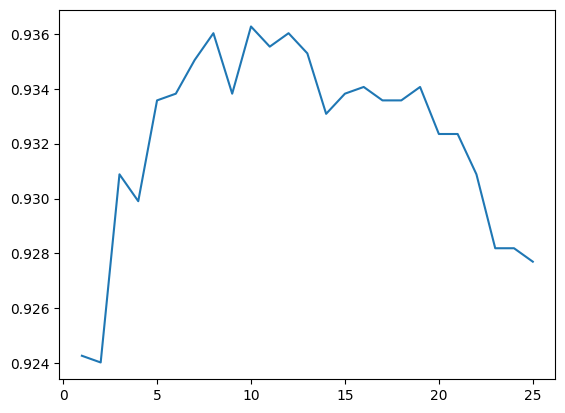

In [ ]:
plt.plot(range(1, len(best_k[1]) + 1), best_k[1])

### Ширина окна - параметр

In [ ]:
def gaussian_kernel(distance, bandwidth=1.0):
    return np.exp(-0.5 * (distance / bandwidth) ** 2)

def parzen_window_knn_with_bandwidth(X_train, y_train, X_test, k=5, bandwidth=1.0):
    distances = pairwise_distances(X_train, X_test)
    predictions = []

    for i in range(X_test.shape[0]):
        neighbors_idx = np.argsort(distances[:, i])[:k]
        weights = gaussian_kernel(distances[neighbors_idx, i], bandwidth)

        weight_per_class = {}
        for idx, weight in zip(neighbors_idx, weights):
            label = y_train.iloc[idx]
            if label in weight_per_class:
                weight_per_class[label] += weight
            else:
                weight_per_class[label] = weight

        predicted_label = max(weight_per_class, key=weight_per_class.get)
        predictions.append(predicted_label)

    return np.array(predictions)

In [ ]:
predict1 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test)
sum(predict1 == y_test.to_numpy()) / len(y_test)

0.9399509803921569

In [ ]:
predict2 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, bandwidth=0.5)
sum(predict2 == y_test.to_numpy()) / len(y_test)

0.9399509803921569

In [ ]:
predict3 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, bandwidth=2.0)
sum(predict3 == y_test.to_numpy()) / len(y_test)

0.9399509803921569

In [ ]:
predict4 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, bandwidth=20.0)
sum(predict4 == y_test.to_numpy()) / len(y_test)

0.9399509803921569

In [ ]:
predict5 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, bandwidth=0.01)
sum(predict5 == y_test.to_numpy()) / len(y_test)

0.9191176470588235

In [ ]:
predict5 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, bandwidth=0.0001)
sum(predict5 == y_test.to_numpy()) / len(y_test)

0.9166666666666666

In [ ]:
best_k1 = find_best_k(parzen_window_knn_with_bandwidth, X, y, max_k=25)
best_k1

Средняя точность для k=1: 0.924264705882353
Средняя точность для k=2: 0.924264705882353
Средняя точность для k=3: 0.9308823529411765
Средняя точность для k=4: 0.9301470588235294
Средняя точность для k=5: 0.933578431372549
Средняя точность для k=6: 0.933578431372549
Средняя точность для k=7: 0.9345588235294118
Средняя точность для k=8: 0.9362745098039216
Средняя точность для k=9: 0.9345588235294118
Средняя точность для k=10: 0.9360294117647059
Средняя точность для k=11: 0.9350490196078431
Средняя точность для k=12: 0.9352941176470588
Средняя точность для k=13: 0.9350490196078431
Средняя точность для k=14: 0.9330882352941177
Средняя точность для k=15: 0.9330882352941177


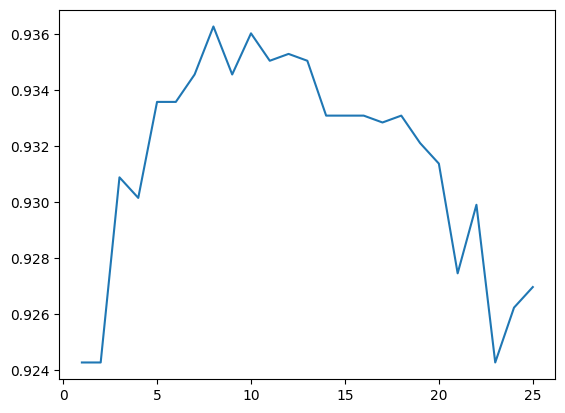

In [ ]:
plt.plot(range(1, len(best_k1[1]) + 1), best_k1[1])

## Библиотечная версия

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights=gaussian_kernel)
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

accuracy = knn_model.score(X_test, y_test)
print(f"Точность: {accuracy}")

Точность: 0.9448529411764706


In [ ]:
predict6 = parzen_window_knn_with_bandwidth(X_train, y_train, X_test, k=10)
sum(predict6 == y_test.to_numpy()) / len(y_test)

0.9448529411764706

In [ ]:
%timeit parzen_window_knn_with_bandwidth(X_train, y_train, X_test, k=10)

358 ms ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit knn_model.predict(X_test)

5.41 ms ± 41.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
knn_model_brute = KNeighborsClassifier(
    n_neighbors=10, weights=gaussian_kernel, algorithm="brute"
)
knn_model_brute.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=10,
                     weights=<function gaussian_kernel at 0x7eb9c6712830>)

In [ ]:
%timeit knn_model_brute.fit(X_train, y_train)

2.44 ms ± 55 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit knn_model_brute.predict(X_test)

18.5 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
